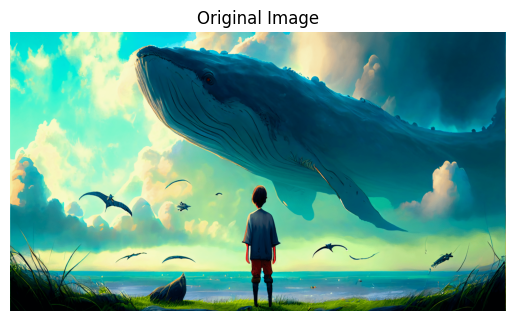

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/9070071.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

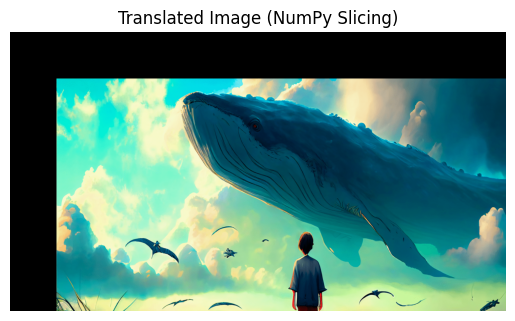

In [ ]:
rows, cols, _ = image.shape
tx, ty = 150, 150

translated_image = np.zeros_like(image)

translated_image[ty:rows, tx:cols] = image[0:rows - ty, 0:cols - tx]

plt.imshow(translated_image)
plt.axis("off")
plt.title("Translated Image (NumPy Slicing)")
plt.show()


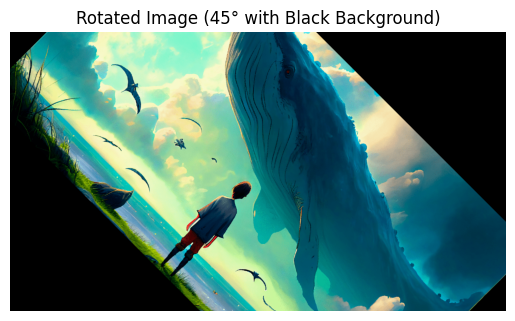

In [ ]:
rows, cols, channels = image.shape
angle = np.radians(45)

cos_a, sin_a = np.cos(angle), np.sin(angle)
rotation_matrix = np.array([[cos_a, -sin_a], [sin_a, cos_a]])

center_x, center_y = cols / 2, rows / 2

x_new, y_new = np.meshgrid(np.arange(cols), np.arange(rows))

coords = np.stack([x_new.ravel() - center_x, y_new.ravel() - center_y])

original_coords = rotation_matrix.T @ coords
original_coords[0] += center_x
original_coords[1] += center_y

x_old, y_old = original_coords.astype(int)

rotated_image = np.zeros_like(image)

valid_mask = (x_old >= 0) & (x_old < cols) & (y_old >= 0) & (y_old < rows)

rotated_image.reshape(-1, channels)[valid_mask] = image[y_old[valid_mask], x_old[valid_mask]]

plt.imshow(rotated_image)
plt.axis("off")
plt.title(f"Rotated Image (45° with Black Background)")
plt.show()


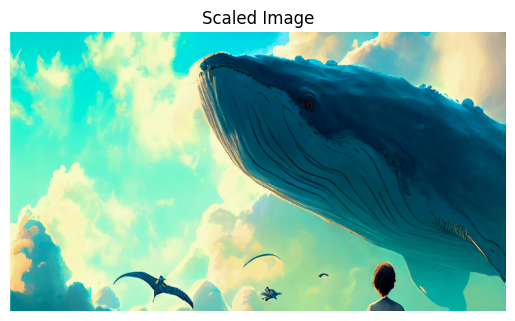

In [ ]:
image = cv2.imread("/content/9070071.png")
rows, cols, channels = image.shape

scale_x, scale_y = 1.5, 1.5

new_width = int(cols * scale_x)
new_height = int(rows * scale_y)

x_new = np.linspace(0, cols - 1, new_width)
y_new = np.linspace(0, rows - 1, new_height)

x_old, y_old = np.meshgrid(np.floor(x_new / scale_x).astype(int),
                           np.floor(y_new / scale_y).astype(int))

x_old = np.clip(x_old, 0, cols - 1)
y_old = np.clip(y_old, 0, rows - 1)

scaled_image = image[y_old, x_old]

plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.axis('Off')
plt.title("Scaled Image")
plt.show()


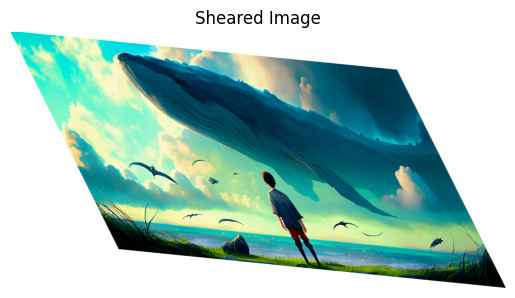

In [17]:

def shear_image(image_path, shear_x=0, shear_y=0):
    image = cv2.imread(image_path)

    original_height, original_width = image.shape[:2]
    new_width = int(original_width + abs(shear_x * original_height))
    new_height = int(original_height + abs(shear_y * original_width))

    sheared_image = np.ones((new_height, new_width, 3), dtype=np.uint8) * 255

    for y in range(original_height):
        for x in range(original_width):
            new_x = int(x + shear_x * y)
            new_y = int(y + shear_y * x)
            if 0 <= new_x < new_width and 0 <= new_y < new_height:
                sheared_image[new_y, new_x] = image[y, x]

    return sheared_image

sheared_img = shear_image("/content/9070071.png", shear_x=0.5, shear_y=0.1)
plt.imshow(cv2.cvtColor(sheared_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Sheared Image")
plt.show()


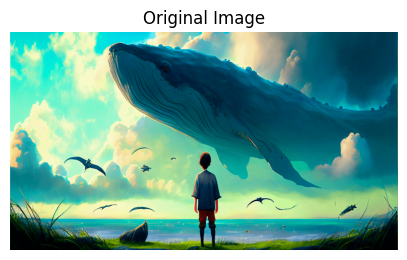

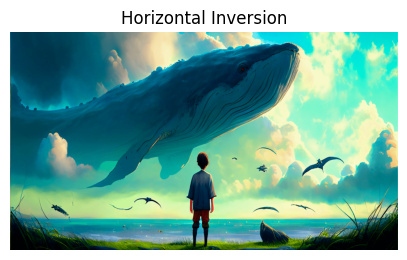

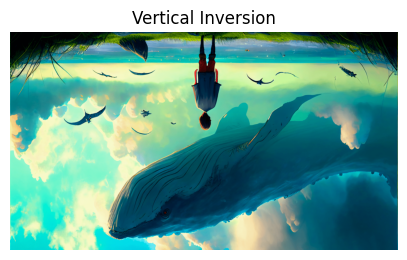

In [22]:
image_path = "/content/9070071.png"

def apply_inversions(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_array = np.array(image_rgb)
    horizontal_inversion = np.flip(img_array, axis=1)
    vertical_inversion = np.flip(img_array, axis=0)
    return img_array, horizontal_inversion, vertical_inversion

original, horizontal, vertical = apply_inversions(image_path)

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(original)
axes.set_title("Original Image")
axes.axis('off')
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(horizontal)
axes.set_title("Horizontal Inversion")
axes.axis('off')
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(vertical)
axes.set_title("Vertical Inversion")
axes.axis('off')
plt.show()
